In [57]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')

In [58]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
X = dataset.iloc[:, 0:6].values
Y = dataset.iloc[:, -1].values

In [61]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [62]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])

In [64]:
X

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [66]:
X

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [67]:
Y = Y.reshape(-1, 1)
Y = sc.fit_transform(Y)

In [68]:
Y

array([[0.25161076],
       [0.00963595],
       [0.05311516],
       ...,
       [0.00810808],
       [0.01414352],
       [0.44724873]])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)

In [70]:
X_train.shape

(1070, 6)

In [71]:
X_test.shape

(268, 6)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [73]:
# define the keras model
model = Sequential(name='sequential_1')
model.add(Dense(12, input_dim=6, activation='relu', name='dense_1'))
model.add(Dense(1,  activation='linear', name='output'))
# compile the keras model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

In [74]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 output (Dense)              (None, 1)                 13        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [76]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=107)

Epoch 1/50
10/10 [==============================] - 0s 889us/step - loss: 0.0354
Epoch 2/50
10/10 [==============================] - 0s 890us/step - loss: 0.0154
Epoch 3/50
10/10 [==============================] - 0s 890us/step - loss: 0.0111
Epoch 4/50
10/10 [==============================] - 0s 889us/step - loss: 0.0088
Epoch 5/50
10/10 [==============================] - 0s 887us/step - loss: 0.0080
Epoch 6/50
10/10 [==============================] - 0s 890us/step - loss: 0.0075
Epoch 7/50
10/10 [==============================] - 0s 890us/step - loss: 0.0073
Epoch 8/50
10/10 [==============================] - 0s 889us/step - loss: 0.0071
Epoch 9/50
10/10 [==============================] - 0s 889us/step - loss: 0.0070
Epoch 10/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 11/50
10/10 [==============================] - 0s 889us/step - loss: 0.0071
Epoch 12/50
10/10 [==============================] - 0s 889us/step - loss: 0.0076
Epoch 13/50
10/10 [========

In [77]:
hist.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [78]:
hist.history.keys()

dict_keys(['loss'])

In [79]:
loss = hist.history['loss']

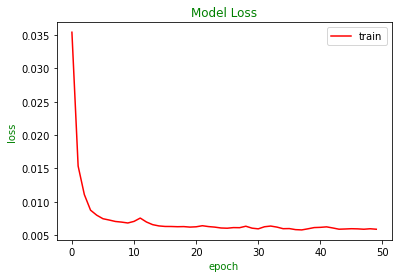

<Figure size 432x288 with 0 Axes>

In [80]:
from matplotlib import pyplot as plt
# plot training loss
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

In [81]:
history_test = model.evaluate(X_test, Y_test, batch_size=107)

3/3 [==============================] - 0s 1ms/step - loss: 0.0055


In [82]:
history_train = model.evaluate(X_train, Y_train, batch_size=107)

10/10 [==============================] - 0s 1ms/step - loss: 0.0057


In [83]:
history_test

0.005489035975188017

In [84]:
history_train

0.0057470290921628475